# *Dataset* 1 (FIFA: fifa.csv)
#### Di sebuah alternate universe , setelah Tsubasa Ozora  tidak berhasil membobol gawang Genzo Wakabayashi, Tsubasa memutuskan untuk menggantung sepatu miliknya dan fokus pada kejuaraan dunia FIFA 19. Agar terbentuk sebuah ultimate team, Tsubasa ingin menambahkan beberapa pemain baru pada tim miliknya.

In [1]:
%matplotlib inline
import math
import warnings
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

# Sumber: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

# Create models from data
def best_fit_distribution(data, bins, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.beta,st.chi,st.chi2,
        st.expon,st.exponnorm,st.f,
        st.gamma,st.lognorm,st.norm,st.t,
        st.uniform,st.weibull_min,st.weibull_max
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

## Import file fifa.csv

In [2]:
fifa = pd.read_csv("fifa.csv")
print(fifa.sample(5))
print("\nlength:",len(fifa))

               Name  Age       Nationality
3514      M. Erdinç   31            Turkey
12805   S. McCartan   24  Northern Ireland
3938    Gelson Dala   21            Angola
6828        J. Vela   24           England
5919   M. Dąbrowski   31            Poland

length: 18207


## Visualisasi Data

### Histogram

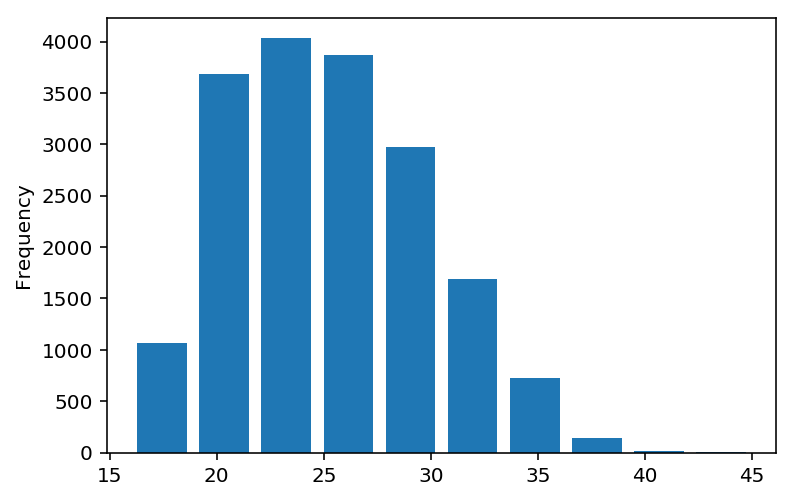

In [3]:
fifa["Age"].plot(kind="hist", rwidth = 0.8)

### Box Plot

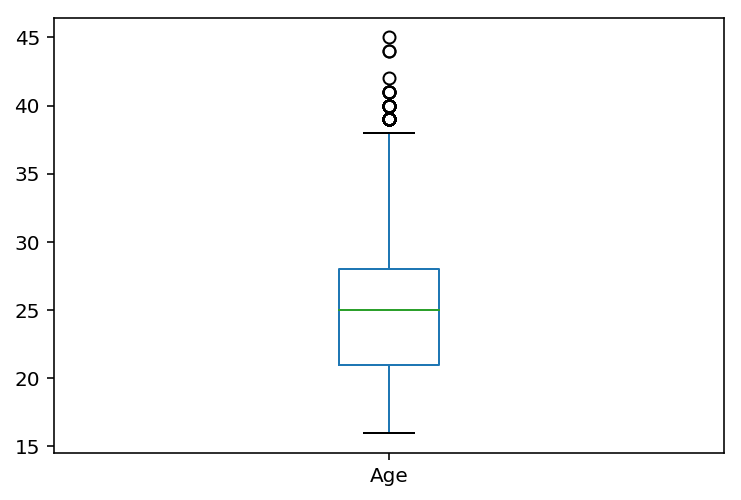

In [4]:
fifa["Age"].plot(kind="box")

## *Statistical Descriptions*

### Minimum Value

In [5]:
print("Minimum value = " + str(fifa["Age"].min()))

Minimum value = 16


### Maximum Value

In [6]:
print("Maximum value = " + str(fifa["Age"].max()))

Maximum value = 45


### Mean

In [7]:
print("Mean value = " + str(fifa["Age"].mean()))

Mean value = 25.122205745043114


### Mode

In [8]:
print("Mode value = " + str(fifa["Age"].mode()[0]))

Mode value = 21


### Median

In [9]:
print("Median value = " + str(fifa["Age"].median()))

Median value = 25.0


### Variance

In [10]:
print("Variance value = " + str(fifa["Age"].var()))

Variance value = 21.808364946571594


### Standard Deviation

In [11]:
print("Standard Deviation value = " + str(fifa["Age"].std()))

Standard Deviation value = 4.66994271341433


### Skewness

In [12]:
print("Skewness Value = " + str(fifa["Age"].skew()))

Skewness Value = 0.3917641387687474


### Kurtosis

In [13]:
print("Kurtosis value = " + str(fifa["Age"].kurt()))

Kurtosis value = -0.4595135539307731


## Fungsi Distribusi Peluang

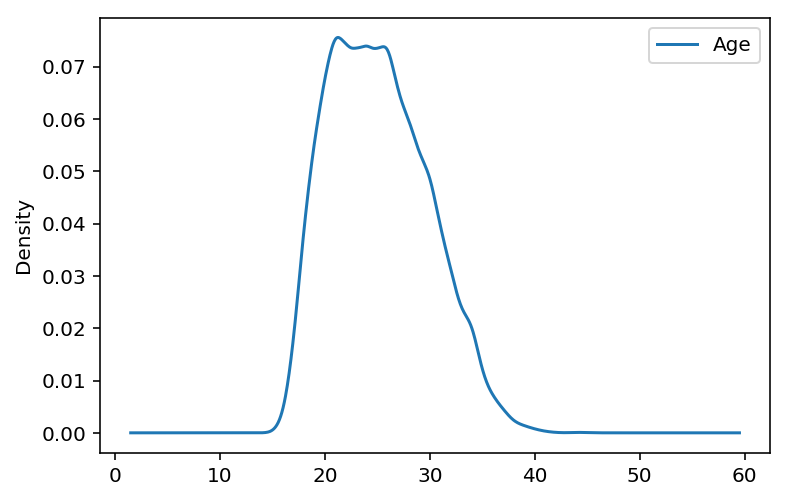

In [14]:
fifa.plot.density()

Text(0,0.5,'Frequency')

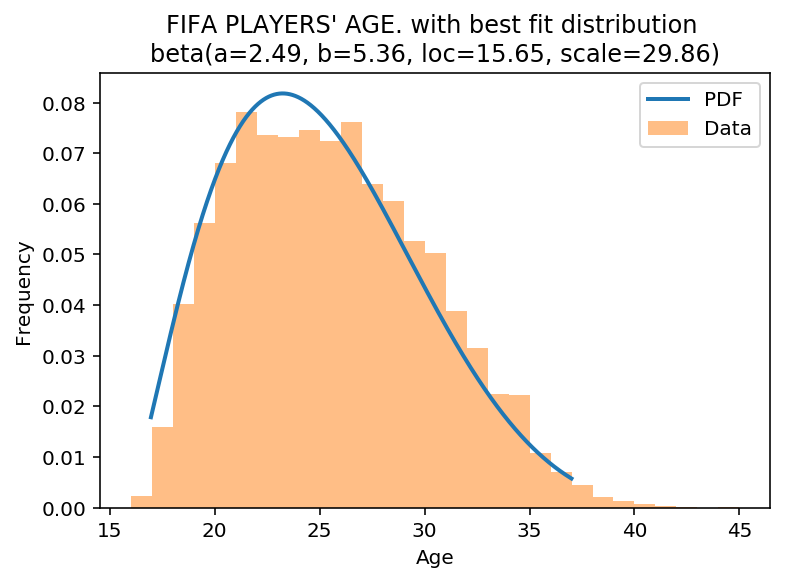

In [76]:
data = fifa["Age"]

param_bins = len(fifa["Age"].value_counts())

best_fit_name, best_fit_params = best_fit_distribution(data, param_bins)
best_dist = getattr(st, best_fit_name)

pdf = make_pdf(best_dist, best_fit_params)

ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'FIFA PLAYERS\' AGE. with best fit distribution \n'+dist_str)
ax.set_xlabel(u'Age')
ax.set_ylabel('Frequency')

### Fungsi distribusi peluang yang digunakan adalah distribusi beta. Pemilihan distribusi beta dikarenakan bentuk distribusi data memiliki bentuk yang paling mirip dengan bentuk fungsi distribusi beta. Hal ini juga didasarkan dari testing menggunakan library scipy.

### Soal a
#### Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi umur pemain bola yang:

In [77]:
jumlah = 1000

#### i. Berumur kurang dari 22 tahun

In [78]:
print("Ekspektasi pemain bola yang umurnya kurang dari 22 tahun :",math.floor(best_dist.cdf(22,*best_fit_params)*jumlah))

Ekspektasi pemain bola yang umurnya kurang dari 22 tahun : 287


#### ii. Berumur lebih dari 40 tahun

In [79]:
print("Ekspektasi pemain bola yang umurnya lebih dari 40 tahun :",math.floor((1-best_dist.cdf(40,*best_fit_params))*jumlah))

Ekspektasi pemain bola yang umurnya lebih dari 40 tahun : 1


# *Dataset* 3 (*Black Friday*: black_friday.csv )
#### Jika di Indonesia ada Harbolnas (Hari Belanja Online Nasional) yang puncaknya biasanya jatuh pada 12–12 alias 12 Desember, di luar negeri juga ada hari belanja di mana penjual dan toko online memberikan diskon besar-besaran, yaitu Black Friday. Black Friday sebenarnya merupakan hari setelah Thanksgiving di Amerika Serikat sana. Bagi kita yang ada di Indonesia, momen Black Friday ini bisa kita manfaatkan untuk belanja dari toko online luar negeri dengan harga miring. Sebelum mengikuti Black Friday tahun 2019 nanti (29–11–2019), mari kita bersama-sama mencari tahu beberapa hal menarikdari data hasil Black Friday tahun 2018 (data merupakan jumlah pembelian seseorang dalam dolar):

## Import file black_friday.csv

In [18]:
black = pd.read_csv("black_friday.csv",header = None)
print(black.sample(5))
print("\nlength:",len(black))

            0
47922    7158
322960   7035
329971   7181
424990  15855
247193  16379

length: 537577


## Visualisasi data

### Histogram

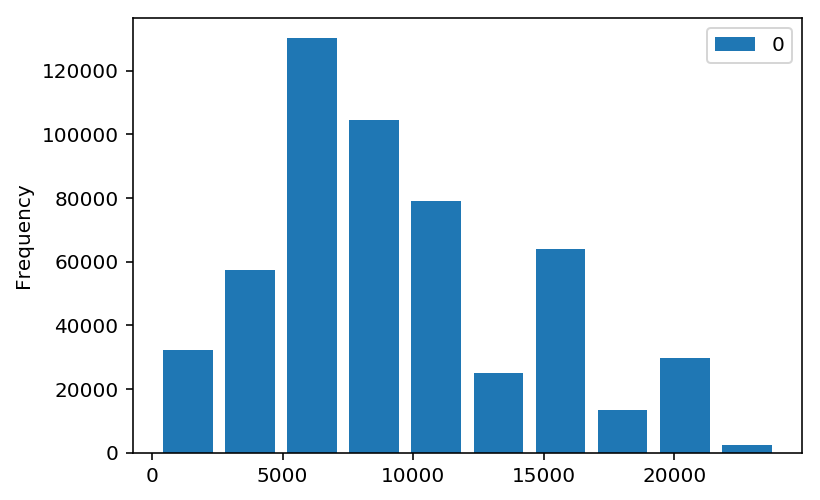

In [19]:
black.plot(kind="hist",rwidth=0.8)

### Box plot

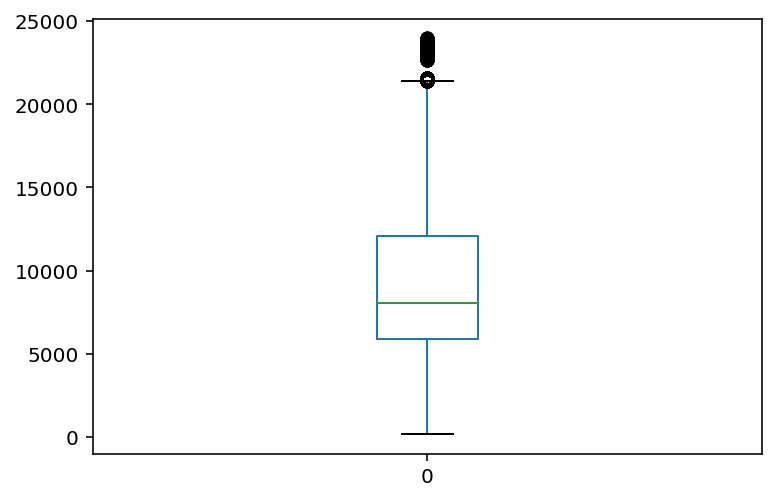

In [20]:
black.plot(kind="box")

## *Statistical descriptions*

### Minimum Value

In [21]:
print("Minimum value = " + str(black.min()[0]))

Minimum value = 185


### Maximum Value

In [22]:
print("Maximum value = " + str(black.max()[0]))

Maximum value = 23961


### Mean

In [23]:
print("Mean value = " + str(black.mean()[0]))

Mean value = 9333.859852635065


### Mode

In [24]:
print("Mode value = " + str(black.mode()[0][0]))

Mode value = 6855


### Median

In [25]:
print("Median value = " + str(black.median()[0]))

Median value = 8062.0


### Variance

In [26]:
print("Variance value = " + str(black.var()[0]))

Variance value = 24810581.48601374


### Standard Deviation

In [27]:
print("Standard Deviation value = " + str(black.std()[0]))

Standard Deviation value = 4981.022132656483


### Skewness

In [28]:
print("Skewness value = " + str(black.skew()[0]))

Skewness value = 0.6242797316083074


### Kurtosis

In [29]:
print("Kurtosis value = " + str(black.kurt()[0]))

Kurtosis value = -0.34312137256836284


## Fungsi Distribusi Peluang

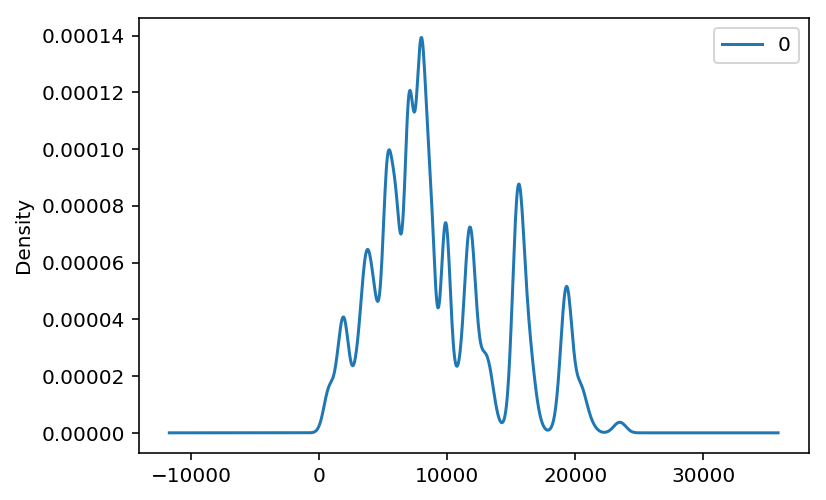

In [82]:
black.plot.density()

Text(0,0.5,'Frequency')

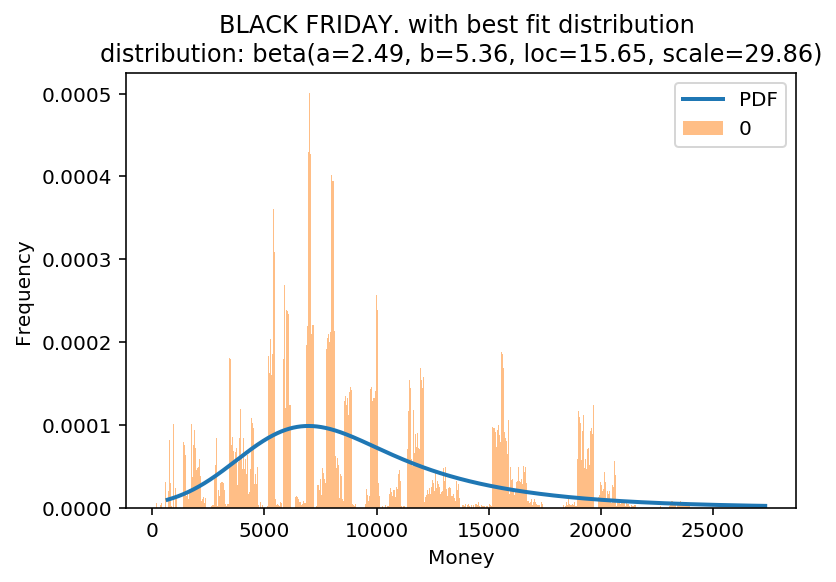

In [99]:
data = black

param_bins = len(black[0].value_counts())

best_fit_name, best_fit_params = best_fit_distribution(data, param_bins)
best_dist = getattr(st, best_fit_name)

pdf = make_pdf(best_dist, best_fit_params)

ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

ax.set_title(u'BLACK FRIDAY. with best fit distribution \ndistribution: '+dist_str)
ax.set_xlabel(u'Money')
ax.set_ylabel('Frequency')

### Fungsi distribusi peluang yang digunakan adalah distribusi beta. Pemilihan distribusi beta dikarenakan bentuk distribusi data memiliki bentuk yang paling mirip dengan bentuk fungsi distribusi beta. Hal ini juga didasarkan dari testing menggunakan library scipy. 

## Jawaban pertanyaan yang terkait dengan *dataset*

### Soal a
#### Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:

In [100]:
jumlah = 250

#### i. Miskin (total pembelian kurang dari 1000 dolar)

In [101]:
print("Ekspektasi pembeli yang Miskin :",math.floor(best_dist.cdf(1000,*best_fit_params)*jumlah))

Ekspektasi pembeli yang Miskin : 3


#### ii. Kaya (total pembelian lebih dari 10000 dolar)

In [102]:
print("Ekspektasi pembeli yang Kaya :",math.floor((1-best_dist.cdf(1000,*best_fit_params))*jumlah))

Ekspektasi pembeli yang Kaya : 246


#### iii. Crazy Rich (total pembelian lebih dari 20000 dolar)

In [103]:
print("Ekspektasi pembeli yang miskin :",math.floor((1-best_dist.cdf(2000,*best_fit_params))*jumlah))

Ekspektasi pembeli yang miskin : 242


### Soal b
#### Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:

In [104]:
jumlah = 1000

#### i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [105]:
print("Ekspektasi pembeli yang pengeluarannya sama seperti Galaxy Fold :",math.floor((best_dist.cdf(2000,*best_fit_params)-best_dist.cdf(1980,*best_fit_params))*jumlah))

Ekspektasi pembeli yang pengeluarannya sama seperti Galaxy Fold : 0


#### ii. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [107]:
print("Ekspektasi pembeli yang pengeluarannya sama seperti MacBook :",math.floor((best_dist.cdf(2897,*best_fit_params)-best_dist.cdf(2707,*best_fit_params))*jumlah))

Ekspektasi pembeli yang pengeluarannya sama seperti MacBook : 7


# Dataset 4 (Cryptocurrency: crypto.csv)
#### Nyonya Rin sangat suka batu permata, tetapi uang yang dia punya terlalu sedikit untuk membiayai kebutuhan berliannya. Dia mendengar bahwa bermain dengan cryptocurrency adalah cara yang sangat cepat untuk menjadi sangat kaya (atau sangat miskin). Anda, sebagai seorang yang haus uang, bersekongkol dengan Nyonya Rin untuk bermain cryptocurrency, di mana Nyonya Rin menyediakan modal. Anda seorang statistikawan dan belum pernah menyentuh pasar modal atau semacamnya, sehingga Anda mengambil data pergerakan harga cryptocurrency, lalu dengan lugunya membuang dimensi waktu dari data tersebut. Nyonya Rin, sama-sama buta dalam permainan pasar modal, menanyakan pertanyaan kurang relevan sebagai berikut:

## Import file crypto.csv

In [38]:
crypto=pd.read_csv("crypto.csv", header = None)
print(crypto.sample(5))
print("\nlength:",len(crypto))

               0
179510  0.016916
166930  0.266623
493496  0.012183
218548  0.000013
472860  0.001051

length: 632218


## Visualisasi Data

### Histogram

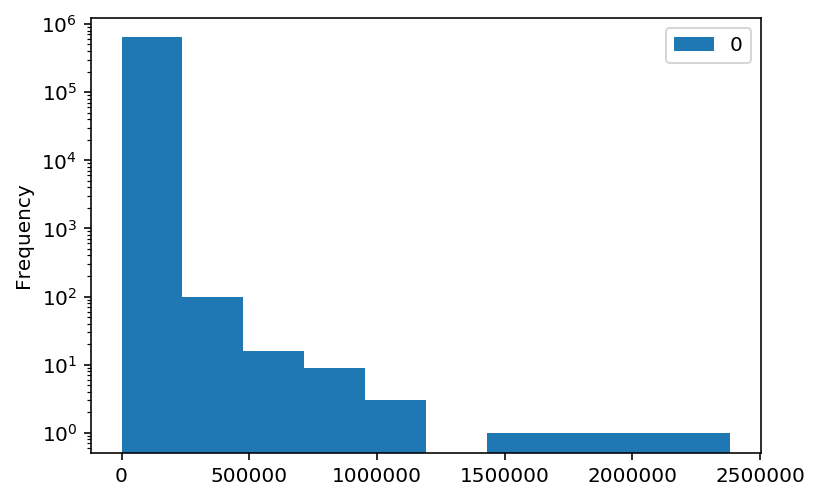

In [39]:
crypto.plot(kind="hist", logy = True)

### Box plot

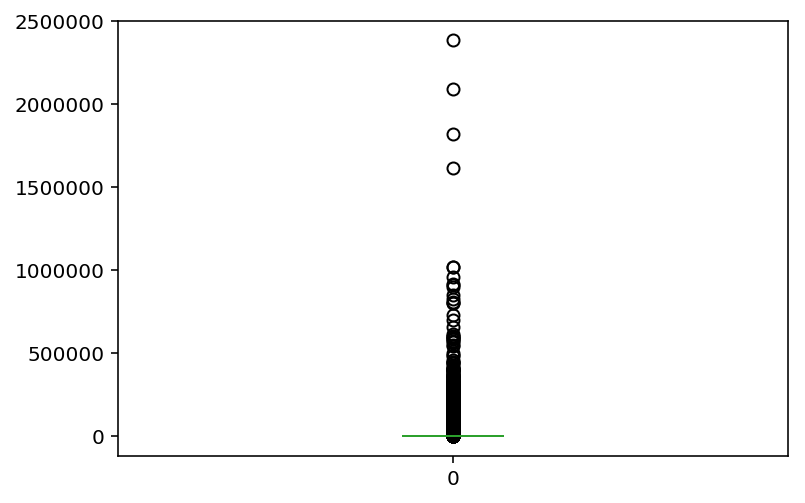

In [40]:
crypto.plot(kind="box")

## Statistical descriptions

### Minimum Value

In [41]:
print("Minimum value = " + str(crypto.min()[0]))

Minimum value = 2.9249999999999997e-09


### Maximum Value

In [42]:
print("Maximum value = " + str(crypto.max()[0]))

Maximum value = 2383502.5


### Mean Value

In [43]:
print("Mean value = " + str(crypto.mean()[0]))

Mean value = 203.01814563577602


### Mode Value

In [44]:
print("Mode value = " + str(crypto.mode()[0][0]))

Mode value = 2e-06


### Median Value

In [45]:
print("Median value = " + str(crypto.median()[0]))

Median value = 0.0097335


### Variance Value

In [46]:
print("Variance value = " + str(crypto.var()[0]))

Variance value = 75320415.21220845


### Standard Deviation Value

In [47]:
print("Standard Deviation value = " + str(crypto.std()[0]))

Standard Deviation value = 8678.733502776107


### Skewness Value

In [48]:
print("Skewness value = " + str(crypto.skew()[0]))

Skewness value = 118.23960755632972


### Kurtosis

In [49]:
print("Kurtosis value = " + str(crypto.kurt()[0]))

Kurtosis value = 22297.470842872517


## Fungsi Distribusi Peluang

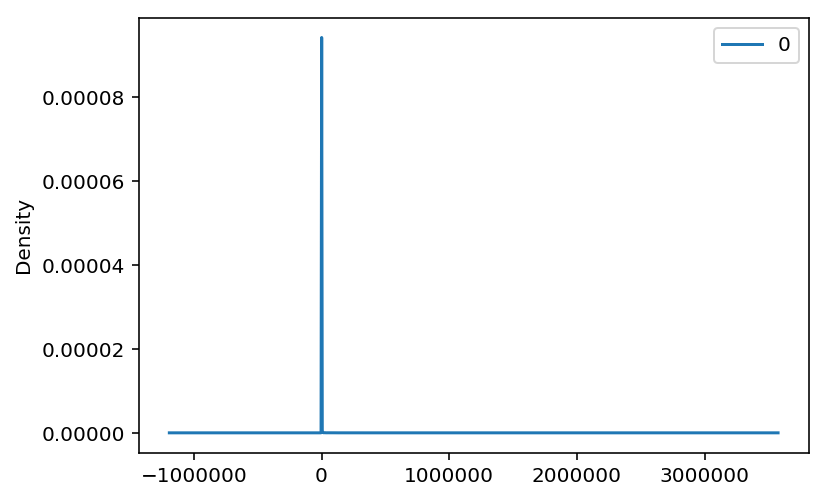

In [50]:
crypto.plot.density(logy=True)

Text(0,0.5,'Frequency')

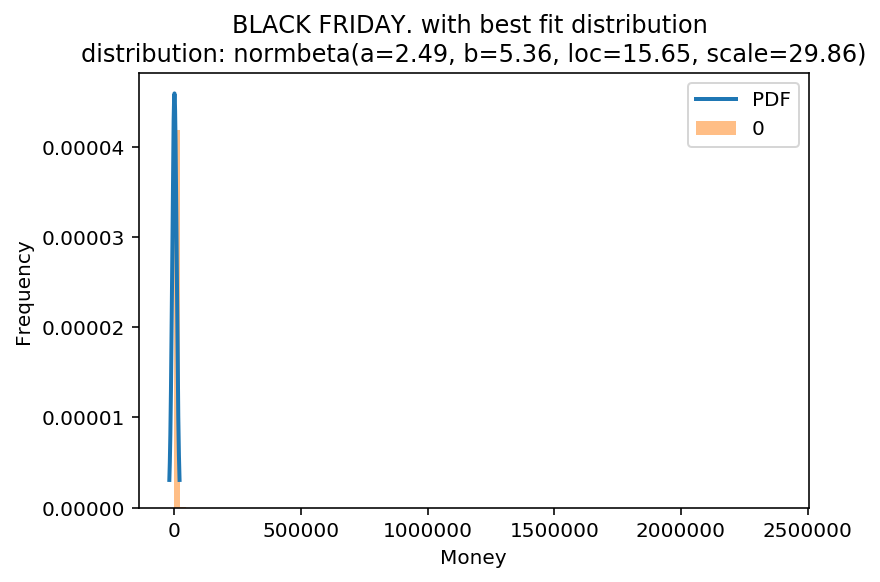

In [92]:
data = crypto

param_bins = 100

best_fit_name, best_fit_params = best_fit_distribution(data, param_bins)
best_dist = getattr(st, best_fit_name)

pdf = make_pdf(best_dist, best_fit_params)

ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

ax.set_title(u'BLACK FRIDAY. with best fit distribution \n'+ dist_str)
ax.set_xlabel(u'Money')
ax.set_ylabel('Frequency')

### Fungsi distribusi peluang yang digunakan adalah distribusi normal. Pemilihan distribusi normal dikarenakan bentuk distribusi data memiliki bentuk yang paling mirip dengan bentuk fungsi distribusi normal. Hal ini juga didasarkan dari testing menggunakan library scipy.

### Soal a
#### Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya

In [93]:
jumlah = 1000

#### i. kurang dari 0.177013

In [94]:
print("Ekspektasi jumlah cryptocurrency < 0.177013:",math.floor(best_dist.cdf(0.177013,*best_fit_params)*jumlah))

Ekspektasi jumlah cryptocurrency < 0.177013: 490


#### ii. lebih dari 177.013

In [95]:
print("Ekspektasi jumlah cryptocurrency > 177.013:",math.floor((1-best_dist.cdf(177013,*best_fit_params))*jumlah))

Ekspektasi jumlah cryptocurrency > 177.013: 0


### Soal b
####  Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai

#### i. lebih dari 0.013

In [96]:
print("Ekspektasi jumlah cryptocurrency > 0.013:",(1-best_dist.cdf(0.013,*best_fit_params)))

Ekspektasi jumlah cryptocurrency > 0.013: 0.509330856289256


#### ii. kurang dari 17.7

In [97]:
print("Ekspektasi jumlah cryptocurrency < 17.7:",best_dist.cdf(17.7,*best_fit_params))

Ekspektasi jumlah cryptocurrency < 17.7: 0.4914819732393939


# *Dataset* 5 (Atlet Olimpiade: athletes.csv)
#### Tuan X adalah seorang mantan atlet tua dan miskin yang melewati kesempatannya meraih kejayaan dalam Olimpiade. Dia memiliki seorang anak, Y, yang dia hendak didik dari bayi untuk menjadi atlet Olimpiade kelas dunia, apapun caranya. Dia telah meminta Anda, seorang statistikawan, untuk menganalisis peluang bocah ingusan tersebut mendapat setidaknya satu medali apapun (emas, perak, perunggu, yang penting dijual dapat uang banyak). Anda memiliki data nama-nama semua atlet yang pernah mengikuti Olimpiade, dari tahun 1800-an hingga 2018, serta jumlah medali apapun yang pernah ia raih seumur hidupnya. Demi kesohoran anak malang tersebut, Anda harus menentukan jawaban persoalan berikut:

## Import file athletes.csv

In [98]:
ath=pd.read_csv("athletes.csv")
print(ath.sample(5))
print("\nlength:",len(ath))

                              Name  Medal
85011    Robert Steven "Steve" Gay      0
126001            Viktor Erik Kjll      1
29659   Franklin Wesley "Bud" Held      0
98767                Vedran Pavlek      0
90402             Shinji Kawashima      0

length: 134731


## Visualisasi data

### Histogram

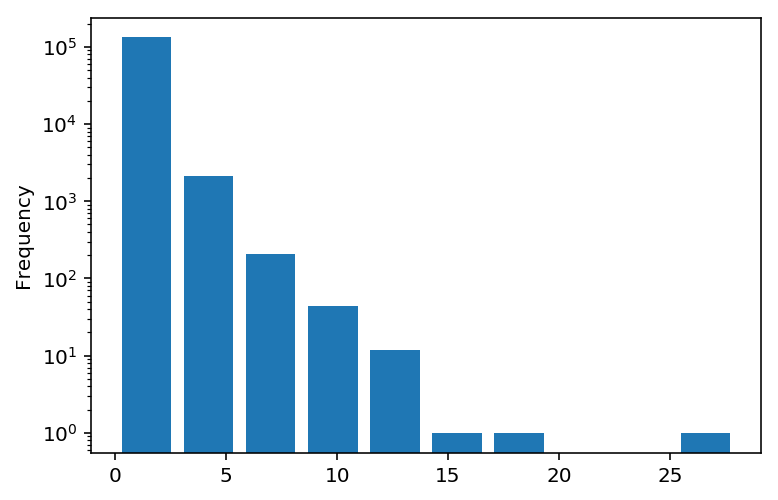

In [57]:
ath["Medal"].plot(kind="hist", rwidth = 0.8,logy=True)

### Box plot

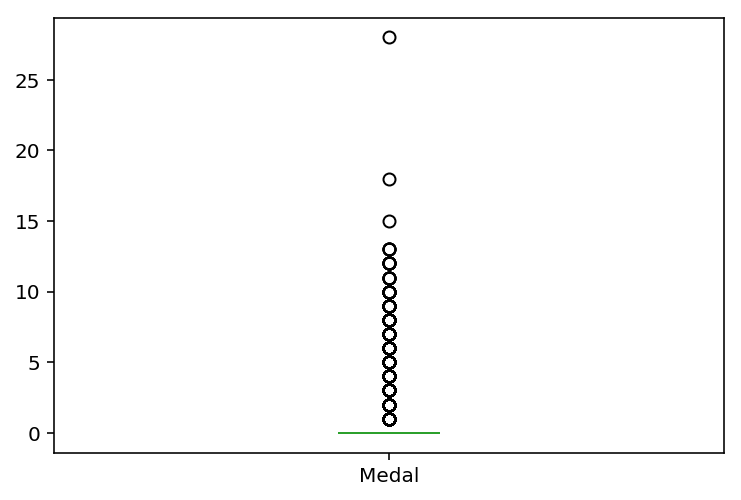

In [58]:
ath["Medal"].plot(kind="box")

## *Statistical descriptions*

### Minimum Value

In [59]:
print("Minimum value = " + str(ath["Medal"].min()))

Minimum value = 0


### Maximum Value

In [60]:
print("Maximum value = " + str(ath["Medal"].max()))

Maximum value = 28


### Mean Value

In [61]:
print("Mean value = " + str(ath["Medal"].mean()))

Mean value = 0.2952772561622789


### Mode Value

In [62]:
print("Mode value = " + str(ath["Medal"].mode()[0]))

Mode value = 0


### Median Value

In [63]:
print("Median value = " + str(ath["Medal"].median()))

Median value = 0.0


### Variance Value

In [64]:
print("Variance value = " + str(ath["Medal"].var()))

Variance value = 0.5252132778008305


### Standard Deviation Value

In [65]:
print("Standard Deviation value = " + str(ath["Medal"].std()))

Standard Deviation value = 0.724715998030146


### Skewness Value

In [66]:
print("Skewness value = " + str(ath["Medal"].skew()))

Skewness value = 4.8199987845312


### Kurtosis

In [67]:
print("Kurtosis  value = " + str(ath["Medal"].kurt()))

Kurtosis  value = 51.562525836059855


## Fungsi distribusi peluang

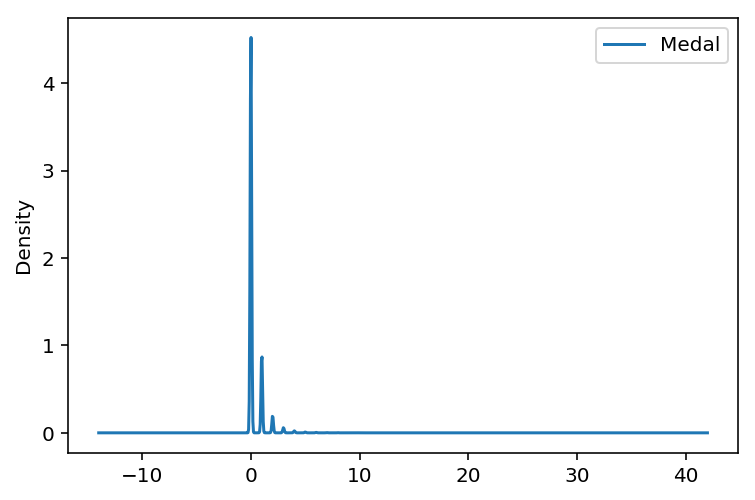

In [68]:
ath.plot.density()

Text(0,0.5,'Frequency')

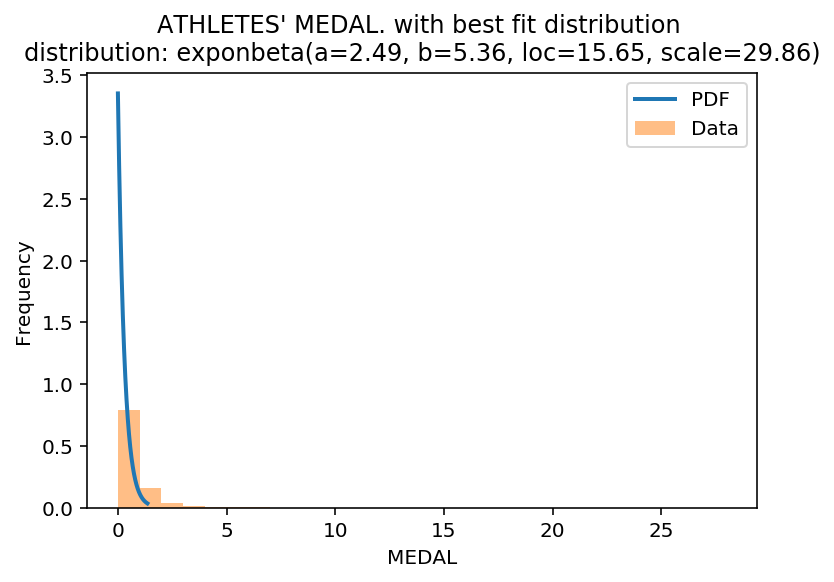

In [83]:
data = ath["Medal"]

param_bins = ath["Medal"].max()-ath["Medal"].min()

best_fit_name, best_fit_params = best_fit_distribution(data, param_bins)
best_dist = getattr(st, best_fit_name)

pdf = make_pdf(best_dist, best_fit_params)

ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

ax.set_title(u'ATHLETES\' MEDAL. with best fit distribution \n'+dist_str)
ax.set_xlabel(u'MEDAL')
ax.set_ylabel('Frequency')

### Fungsi distribusi peluang yang digunakan adalah distribusi exponensial. Pemilihan distribusi exponensial dikarenakan bentuk distribusi data memiliki bentuk yang paling mirip dengan bentuk fungsi distribusi exponensial. Hal ini juga didasarkan dari testing menggunakan library scipy.

## Jawaban pertanyaan yang terkait dengan dataset

### Soal a 
#### Peluang Y meraih

#### i. tepat 0 medali

In [84]:
print("Peluang Y meraih tepat 0 medali : " + str(best_dist.cdf(0.5,*best_fit_params)-best_dist.cdf(-0.5,*best_fit_params)))

Peluang Y meraih tepat 0 medali : 0.816092760476377


#### ii. lebih dari 10 medali

In [85]:
print("Peluang Y meraih tepat 0 medali : " + str(1-best_dist.cdf(9.5,*best_fit_params)))

Peluang Y meraih tepat 0 medali : 1.0658141036401503e-14


#### iii. tepat 3 medali

In [110]:
print("Peluang Y meraih tepat 3 medali : " + str(best_dist.cdf(3.5,*best_fit_params)-best_dist.cdf(2.5,*best_fit_params)))

Peluang Y meraih tepat 3 medali : 5.311534244673705e-06


#### iv. 1 atau 5 medali

In [108]:
print("Peluang Y meraih 1 atau 5 medali : " + str((best_dist.cdf(1.5,*best_fit_params)-best_dist.cdf(0.5,*best_fit_params)) + (best_dist.cdf(5.5,*best_fit_params)-best_dist.cdf(4.5,*best_fit_params))))

Peluang Y meraih 1 atau 5 medali : 1.062308299833864e-05


### Soal b
#### *Confidence interval 95%*

In [109]:
print("Confidence Interval 95% : " + str(best_dist.interval(0.95,*best_fit_params)))

Confidence Interval 95% : (1718.9550513995296, 22911.882573411567)
